In [1]:
!pip install pandas
!pip install wordcloud
!pip install xgboost







[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy matplotlib seaborn scikit-learn nltk


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df=pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.duplicated().sum()

np.int64(403)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.rename(columns={'v1':'label','v2':'email'},inplace=True)
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
df['label']=le.fit_transform(df['label'])
df.head()

,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5169, 2)

In [13]:
df.info

<bound method DataFrame.info of       label                                              email
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5169 rows x 2 columns]>

In [14]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

Text(0.5, 1.0, 'Ham vs Spam Distribution')

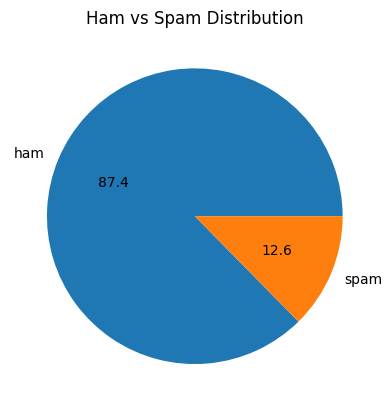

In [15]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct='%0.1f')
plt.title('Ham vs Spam Distribution')

Text(0, 0.5, 'Count')

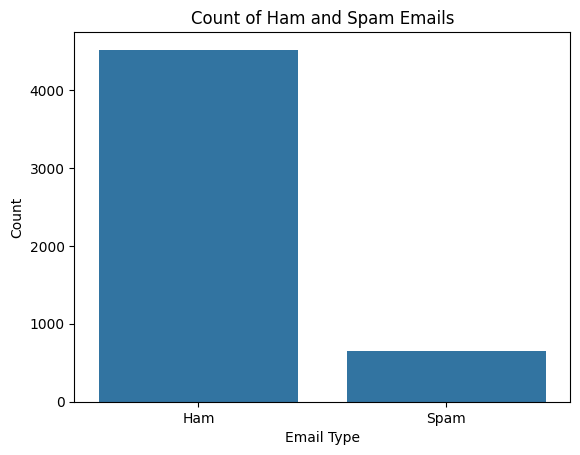

In [16]:
sns.countplot(x='label',data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Count of Ham and Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [19]:
df['sentence count']=df['email'].apply(lambda x: len(sent_tokenize(x)))
df.head()

,label,email,sentence count
0,0,"Go until jurong point, crazy.. Available only ...",2
1,0,Ok lar... Joking wif u oni...,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,0,U dun say so early hor... U c already then say...,1
4,0,"Nah I don't think he goes to usf, he lives aro...",1


In [20]:
df['word count']=df['email'].apply(lambda x: len(word_tokenize(x)))
df.head()

,label,email,sentence count,word count
0,0,"Go until jurong point, crazy.. Available only ...",2,24
1,0,Ok lar... Joking wif u oni...,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37
3,0,U dun say so early hor... U c already then say...,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15


In [21]:
df['character count']=df['email'].apply(len)
df

,label,email,sentence count,word count,character count
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,4,35,161
5568,0,Will Ì_ b going to esplanade fr home?,1,9,37
5569,0,"Pity, * was in mood for that. So...any other s...",2,15,57
5570,0,The guy did some bitching but I acted like i'd...,1,27,125


In [22]:
df.groupby('label')['character count'].mean()

label
0     70.459256
1    137.891271
Name: character count, dtype: float64

In [23]:
def text_process(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    ftext=[]
    for wd in text:
        if wd.isalnum and wd not in string.punctuation and wd not in stopwords.words('english'):
            ftext.append(wd)
    lem=WordNetLemmatizer()
    ftext=[lem.lemmatize(wd) for wd in ftext]
    return ' '.join(ftext)


In [24]:
df['transformed_text']=df['email'].apply(text_process)


In [25]:
df['transformed_text']

0       go jurong point crazy .. available bugis n gre...
1                         ok lar ... joking wif u oni ...
2       free entry 2 wkly comp win fa cup final tkts 2...
3             u dun say early hor ... u c already say ...
4                 nah n't think go usf life around though
                              ...                        
5567    2nd time tried 2 contact u. u å£750 pound priz...
5568                         ì_ b going esplanade fr home
5569                             pity mood ... suggestion
5570    guy bitching acted like 'd interested buying s...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

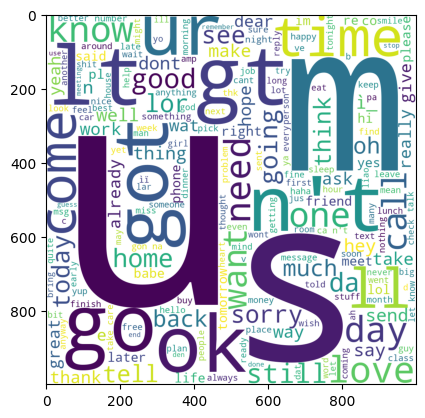

In [48]:
ham_wc=wc.generate(' '.join(df[df['label']==0]['transformed_text']))
plt.imshow(ham_wc)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv=CountVectorizer()
x=cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 8117))

In [30]:
y=df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [33]:
lr=LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced')
svc=SVC(kernel='rbf', gamma='scale', class_weight='balanced')
dtc=DecisionTreeClassifier(max_depth=3, class_weight='balanced' )
rfc=RandomForestClassifier(n_estimators=100, random_state=2, max_features='sqrt', class_weight='balanced')
knc=KNeighborsClassifier()
base=DecisionTreeClassifier(max_depth=1, class_weight='balanced' )
abc=AdaBoostClassifier(n_estimators=50, random_state=2, estimator=base)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()

In [34]:
mnb.fit(xtrain,ytrain)
ypredmnb=mnb.predict(xtest)
print(accuracy_score(ytest,ypredmnb))
print(confusion_matrix(ytest,ypredmnb))
print(precision_score(ytest,ypredmnb))

0.9709864603481625
[[875  21]
 [  9 129]]
0.86


In [35]:
bnb.fit(xtrain,ytrain)
ypredbnb=bnb.predict(xtest)
print(accuracy_score(ytest,ypredbnb))
print(confusion_matrix(ytest,ypredbnb))
print(precision_score(ytest,ypredbnb))

0.9748549323017408
[[892   4]
 [ 22 116]]
0.9666666666666667


In [36]:
gnb.fit(xtrain,ytrain)
ypredgnb=gnb.predict(xtest)
print(accuracy_score(ytest,ypredgnb))
print(confusion_matrix(ytest,ypredgnb))
print(precision_score(ytest,ypredgnb))

0.902321083172147
[[811  85]
 [ 16 122]]
0.5893719806763285


In [37]:
lr.fit(xtrain,ytrain)
ypredlr=lr.predict(xtest)
print(accuracy_score(ytest,ypredlr))
print(confusion_matrix(ytest,ypredlr))
print(precision_score(ytest,ypredlr))

0.9816247582205029
[[888   8]
 [ 11 127]]
0.9407407407407408


In [38]:
svc.fit(xtrain,ytrain)
ypredsvc=svc.predict(xtest)
print(accuracy_score(ytest,ypredsvc))
print(confusion_matrix(ytest,ypredsvc))
print(precision_score(ytest,ypredsvc))

0.97678916827853
[[893   3]
 [ 21 117]]
0.975


In [39]:
dtc.fit(xtrain,ytrain)
ypreddtc=dtc.predict(xtest)
print(accuracy_score(ytest,ypreddtc))
print(confusion_matrix(ytest,ypreddtc))
print(precision_score(ytest,ypreddtc))

0.9206963249516441
[[865  31]
 [ 51  87]]
0.7372881355932204


In [40]:
rfc.fit(xtrain,ytrain)
ypredrfc=rfc.predict(xtest)
print(accuracy_score(ytest,ypredrfc))
print(confusion_matrix(ytest,ypredrfc))
print(precision_score(ytest,ypredrfc))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [41]:
knc.fit(xtrain,ytrain)
ypredknc=knc.predict(xtest)
print(accuracy_score(ytest,ypredknc))
print(confusion_matrix(ytest,ypredknc))
print(precision_score(ytest,ypredknc))

0.9013539651837524
[[896   0]
 [102  36]]
1.0


In [42]:
abc.fit(xtrain,ytrain)
ypredabc=abc.predict(xtest)
print(accuracy_score(ytest,ypredabc))
print(confusion_matrix(ytest,ypredabc))
print(precision_score(ytest,ypredabc))

0.8936170212765957
[[865  31]
 [ 79  59]]
0.6555555555555556


In [43]:
etc.fit(xtrain,ytrain)
ypredetc=etc.predict(xtest)
print(accuracy_score(ytest,ypredetc))
print(confusion_matrix(ytest,ypredetc))
print(precision_score(ytest,ypredetc))

0.9748549323017408
[[895   1]
 [ 25 113]]
0.9912280701754386


In [44]:
gbc.fit(xtrain,ytrain)
ypredgbc=gbc.predict(xtest)
print(accuracy_score(ytest,ypredgbc))
print(confusion_matrix(ytest,ypredgbc))
print(precision_score(ytest,ypredgbc))

0.9477756286266924
[[895   1]
 [ 53  85]]
0.9883720930232558


In [45]:
xgb.fit(xtrain,ytrain)
ypredxgb=xgb.predict(xtest)
print(accuracy_score(ytest,ypredxgb))
print(confusion_matrix(ytest,ypredxgb))
print(precision_score(ytest,ypredxgb))

0.9796905222437138
[[893   3]
 [ 18 120]]
0.975609756097561
